In [189]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

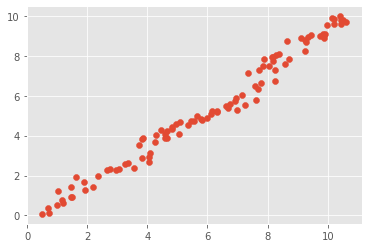

In [190]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

noise = np.random.rand(100, 1)
X = sorted(10 * np.random.rand(100, 1)) + noise
y = sorted(10 * np.random.rand(100))

plt.scatter(X, y);

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [192]:
print(f'선형회귀 가중치 : {model.coef_}')
print(f'선형회귀 편향 : {model.intercept_}\n')
print(f'학습데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')

선형회귀 가중치 : [0.97197701]
선형회귀 편향 : -0.5244328409400909

학습데이터 점수 : 0.9780009644398913
평가데이터 점수 : 0.9836790497238652


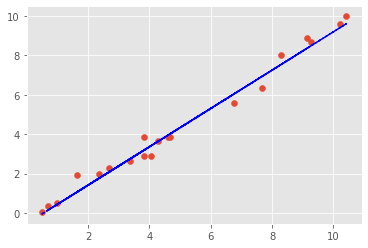

In [193]:
y_pred = model.predict(X_test)

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, '--b');

## 보스턴 집값 데이터 사용해보기

In [194]:
from sklearn.datasets import load_boston

boston = load_boston()

print(boston.keys())
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highway

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        tar

In [242]:
import pandas as pd

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


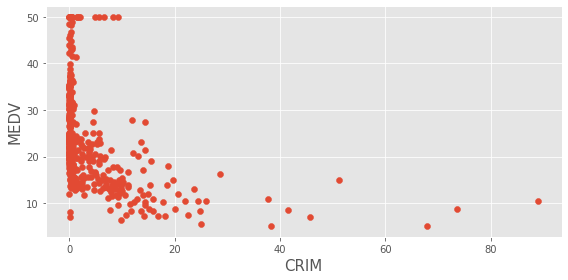

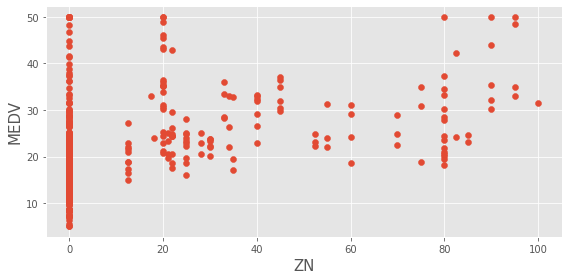

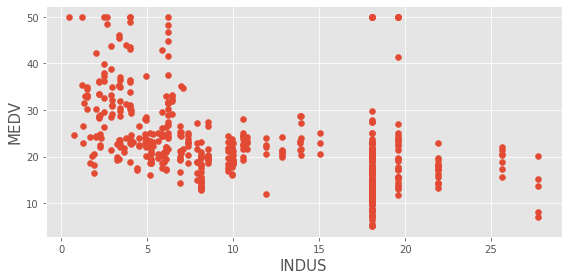

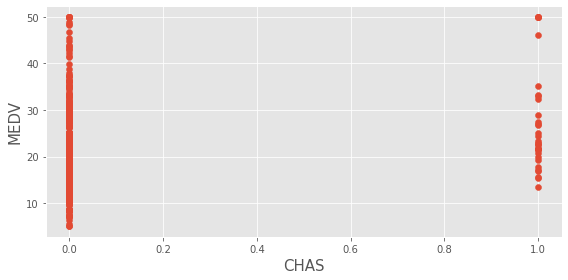

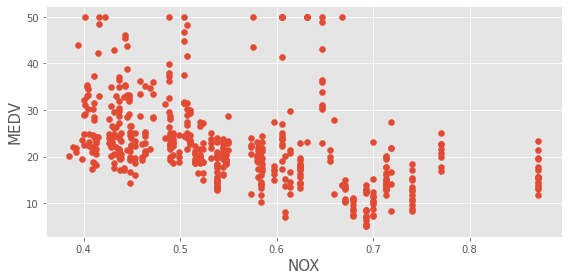

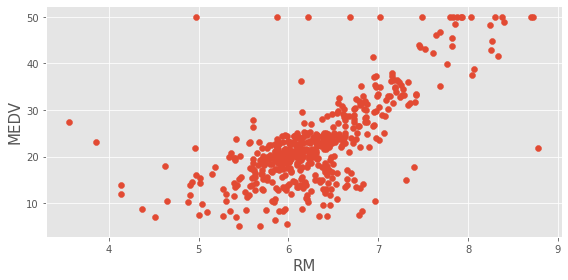

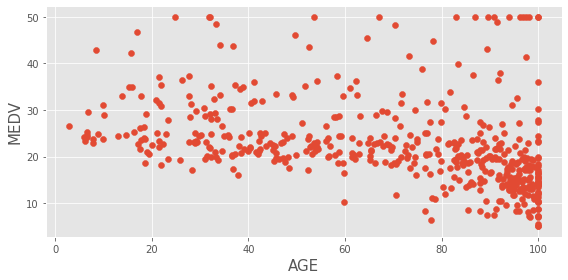

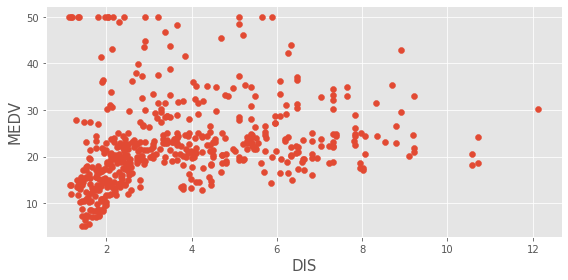

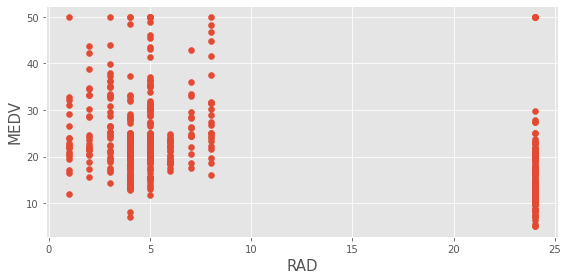

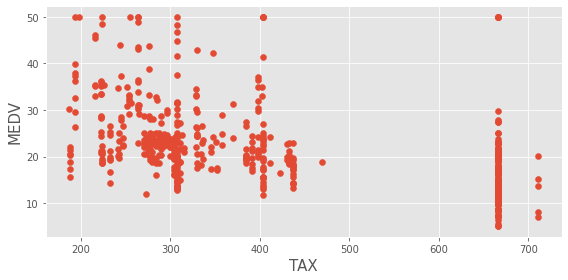

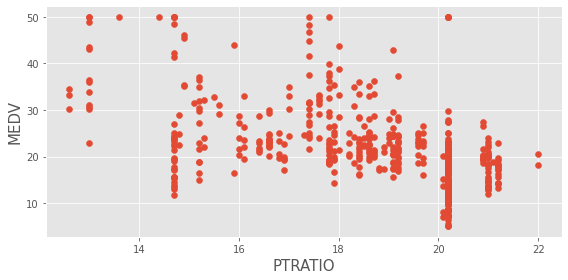

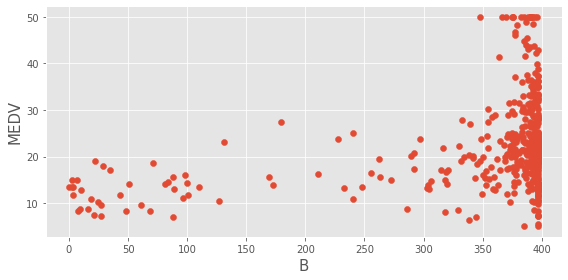

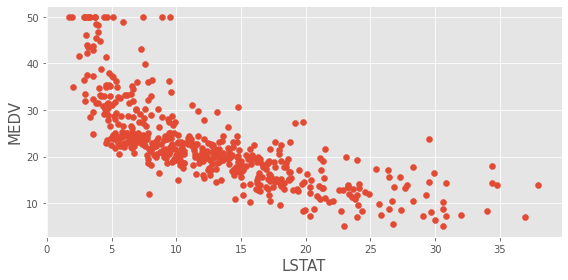

In [243]:
#각 column과 target의 상관관계를 산점도로 시각화
for i, col in enumerate(df.columns[:-1]):
    plt.figure(figsize=(8,4))
    plt.scatter(df[col], df['MEDV'])
    plt.ylabel('MEDV', size=15)
    plt.xlabel(col, size=15)
    plt.tight_layout();

In [241]:
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=2)

model.fit(X_train, y_train)

print(f'학습데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')

학습데이터 점수 : 0.7285831776605591
평가데이터 점수 : 0.7789207451814415


In [200]:
from sklearn.model_selection import cross_val_score

nmse_scores = cross_val_score(model, boston.data, boston.target, cv=10, scoring='neg_mean_squared_error')

r2_scores = cross_val_score(model, boston.data, boston.target, cv=10, scoring='r2')

print(f'NMSE scores : {nmse_scores}')
print(f'평균 NMSE score : {nmse_scores.mean()}\n')
print(f'R2 scores : {r2_scores}')
print(f'평균 R2 score : {r2_scores.mean()}')

NMSE scores : [  -9.28694671  -14.15128316  -14.07360615  -35.20692433  -31.88511666
  -19.83587796   -9.94726918 -168.37537954  -33.32974507  -10.96041068]
평균 NMSE score : -34.70525594452486

R2 scores : [ 0.73376082  0.4730725  -1.00631454  0.64113984  0.54766046  0.73640292
  0.37828386 -0.12922703 -0.76843243  0.4189435 ]
평균 R2 score : 0.2025289900605644


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be remove

In [201]:
#각각의 feature들의 가중치(coef) 확인
print(f'y = {model.intercept_} \n')  #bias
for i, c in enumerate(model.coef_):  #i는 상수항, c는 가중치
    print(f'x{i} * {c}')

y = 37.19980774264983 

x0 * -0.1082235572539196
x1 * 0.038903934898171434
x2 * -0.015151762702458596
x3 * 3.158979409924922
x4 * -16.585406974437117
x5 * 3.6328848642632288
x6 * 0.00935052187002783
x7 * -1.3861815108299709
x8 * 0.324065944965514
x9 * -0.01162451668818771
x10 * -1.0364425106025934
x11 * 0.011612748903911901
x12 * -0.558409340468615


In [244]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = model.predict(X_train)
train_rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
train_r2 = r2_score(y_train, y_train_pred)

y_test_pred = model.predict(X_test)
test_rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
test_r2 = r2_score(y_test, y_test_pred)

print(f'훈련 RMSE : {train_rmse}')      #낮을수록 좋음
print(f'훈련 R2 score : {train_r2}')    #높을수록 좋음

print(f'평가 RMSE : {test_rmse}')     
print(f'평가 R2 score : {test_r2}')
#훈련점수보다 평가점수가 더 좋아보임

훈련 RMSE : 4.791001312472465
훈련 R2 score : 0.7285831776605591
평가 RMSE : 4.300630200615767
평가 R2 score : 0.7789207451814415


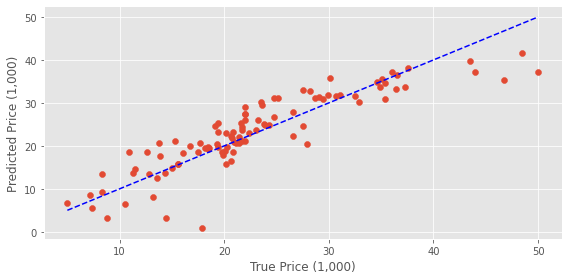

In [204]:
def plot_boston(true, predict):
    plt.figure(figsize=(8,4))
    plt.scatter(true, predict)
    plt.plot([5,50], [5,50], '--b')
    plt.xlabel('True Price (1,000)')
    plt.ylabel('Predicted Price (1,000)')
    plt.tight_layout();
    
y_pred = model.predict(X_test)

plot_boston(y_test, y_pred)

## 캘리포니아 집값 데이터 사용해보기 

In [205]:
from sklearn.datasets import fetch_california_housing

cali = fetch_california_housing()

print(cali.keys())
print(cali.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
ex

In [206]:
df = pd.DataFrame(cali.data, columns=cali.feature_names)
df['target'] = cali.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [207]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


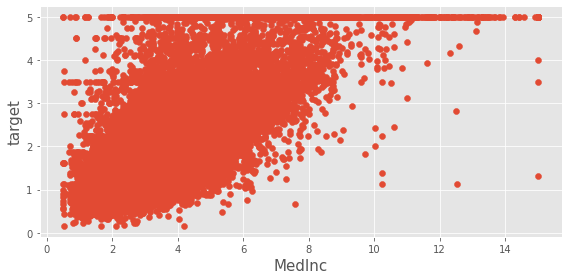

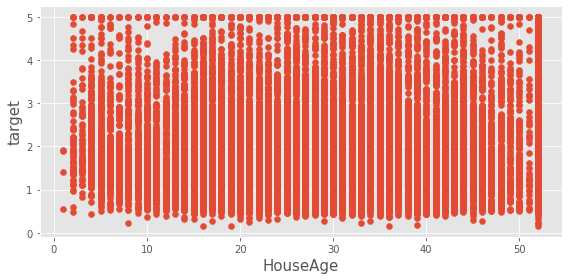

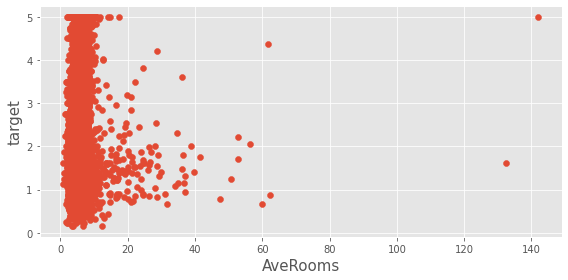

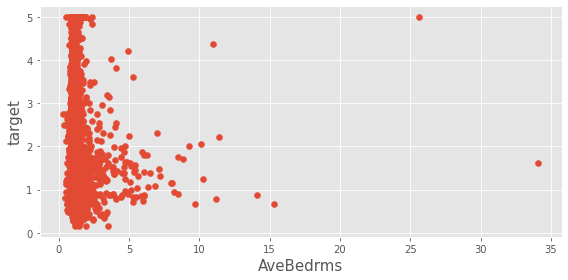

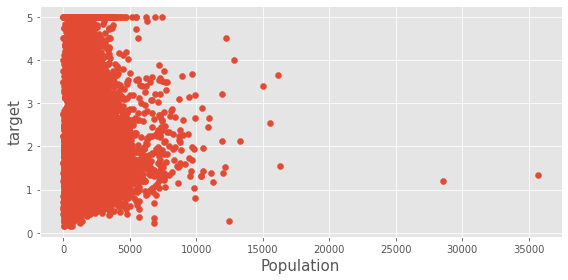

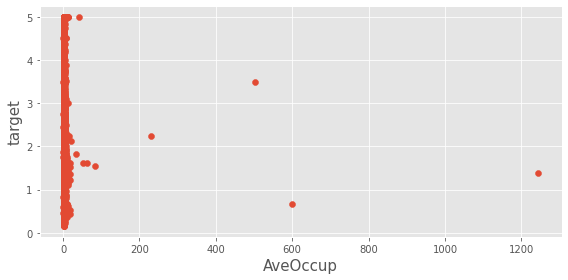

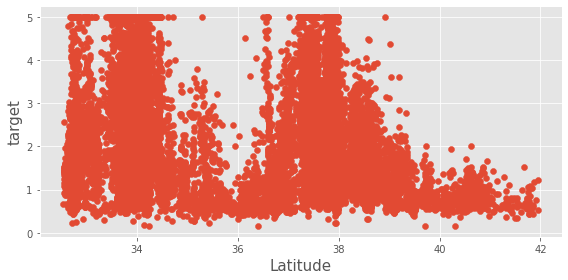

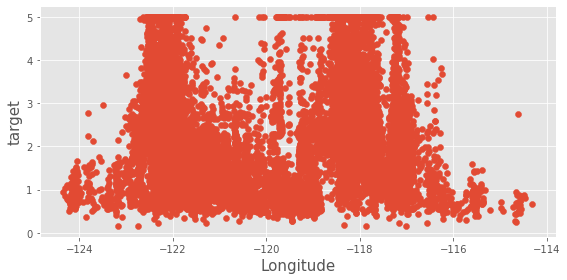

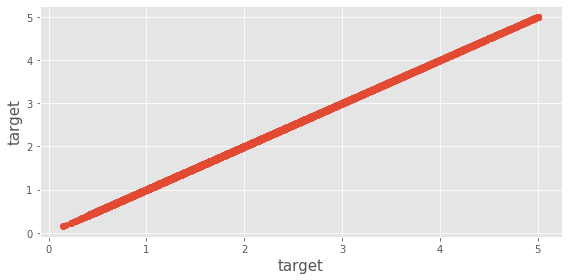

In [208]:
#각 column과 target의 상관관계를 산점도로 시각화
for i, col in enumerate(df.columns):
    plt.figure(figsize=(8,4))
    plt.scatter(df[col], df['target'])
    plt.ylabel('target', size=15)
    plt.xlabel(col, size=15)
    plt.tight_layout();

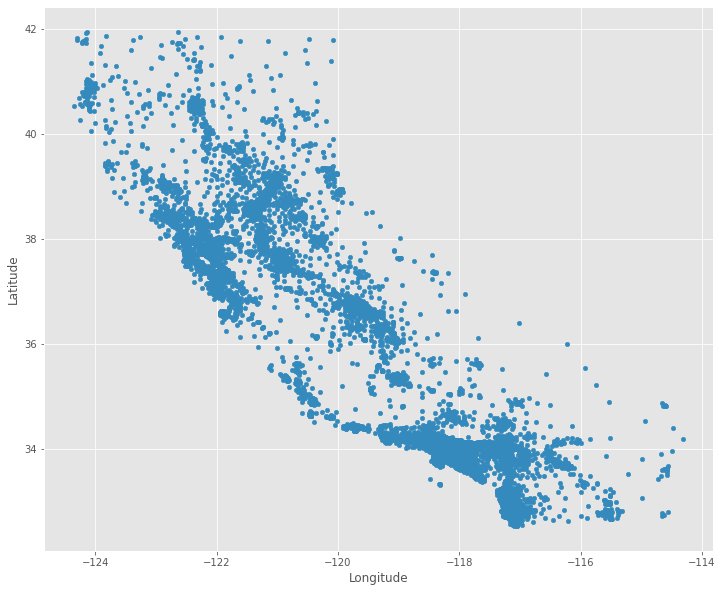

In [209]:
#위도, 경도 데이터를 이용하면 캘리포니아 지도처럼 확인 가능
df.plot(kind='scatter', x='Longitude', y='Latitude', figsize=(12,10));

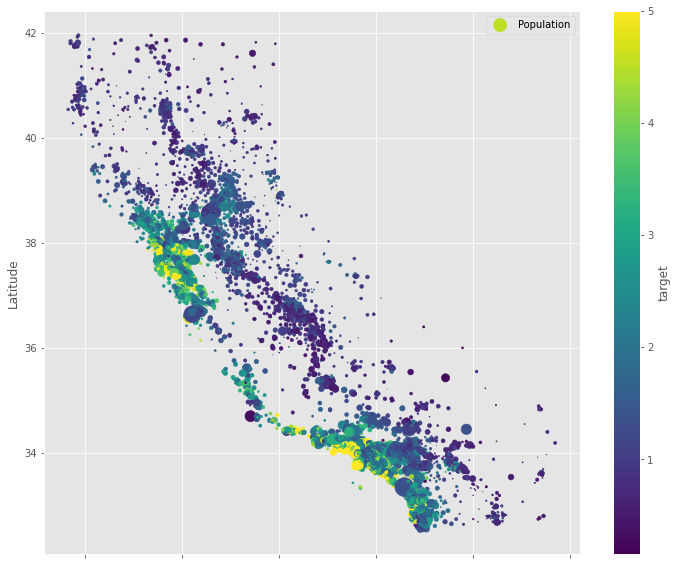

In [210]:
#가격이 높은 주택과 인구가 해안가에 많이 몰려있음
df.plot(kind='scatter', x='Longitude', y='Latitude', figsize=(12,10),
        s=df['Population']/100, label='Population', 
        c='target', cmap=plt.get_cmap('viridis'), colorbar=True);

In [211]:
model = LinearRegression(normalize=True)

X_train, X_test, y_train, y_test = train_test_split(cali.data, cali.target, test_size=0.2, random_state=2)

model.fit(X_train, y_train)

print(f'학습데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')

nmse_scores = cross_val_score(model, cali.data, cali.target, cv=10, scoring='neg_mean_squared_error')
print(f'평균 NMSE : {nmse_scores.mean()}')

r2_scores = cross_val_score(model, cali.data, cali.target, cv=10, scoring='r2')
print(f'평균 R2 score : {r2_scores.mean()}')

학습데이터 점수 : 0.6068205998456939
평가데이터 점수 : 0.6013853272055165
평균 NMSE : -0.5509524296956645
평균 R2 score : 0.5110068610523766


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be remove

In [212]:
#각각의 feature들의 가중치(coef) 확인
print(f'y = {model.intercept_} \n')  #bias
for i, c in enumerate(model.coef_):  #i는 상수항, c는 가중치
    print(f'x{i} * {c}')

y = -36.02283090652935 

x0 * 0.440945740969648
x1 * 0.009125568150674817
x2 * -0.11365470901329924
x3 * 0.6194656268026545
x4 * -6.708344082478044e-06
x5 * -0.004095741195381613
x6 * -0.4119815151312927
x7 * -0.42453974164653985


In [213]:
y_train_pred = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = r2_score(y_train, y_train_pred)

print(f'RMSE : {rmse}')    
print(f'R2 score : {r2}')   

RMSE : 0.7224911853503633
R2 score : 0.6068205998456939


In [214]:
y_test_pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2 = r2_score(y_test, y_test_pred)

print(f'RMSE : {rmse}')     
print(f'R2 score : {r2}')

RMSE : 0.7327644142619772
R2 score : 0.6013853272055165


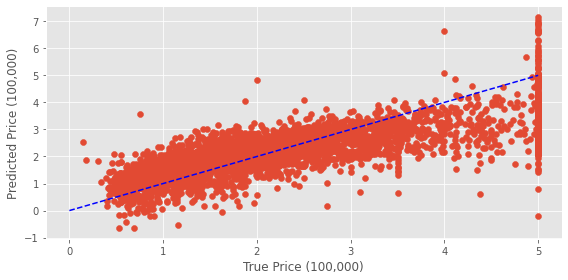

In [215]:
def plot_california(true, predict):
    plt.figure(figsize=(8,4))
    plt.scatter(true, predict)
    plt.plot([0,5], [0,5], '--b')
    plt.xlabel('True Price (100,000)')
    plt.ylabel('Predicted Price (100,000)')
    plt.tight_layout();
    
y_pred = model.predict(X_test)

plot_california(y_test, y_pred)

## Ridge Regression(L2 regularization)
+ 선형회귀를 개선한 선형 모델
+ 다중공선성 문제를 방지해 모델의 과대적합을 방지
    + 다중공선성 : 두 특성이 일치에 가까울 정도로 관련성(상관관계)가 높을 경우 발생
+ 가중치 각각을 제곱해서 모두 더하는 방식
    + 모델의 설명력에 기여하지 못하는 독립변수의 회귀계수를 0에 근접하도록 축소시킨다.
+ 릿지 회귀는 가중치에 제약을 두기 때문에 선형회귀 모델보다 훈련데이터 점수가 낮을 수 있음
+ 하지만 일반화 성능은 릿지 회귀가 더 높기 때문에, 평가데이터 점수는 릿지 회귀가 더 좋음
    + 일반화 성능에 영향을 주는 매개 변수인 alpha 값을 조정해보면서, 성능이 어떻게 변하는지 확인 필요
    + alpha : 패널티를 얼마나 줄 것인지 조절, 0이라면 선형회귀와 동일하며, alpha가 커질수록 모든 가중치가 0에 가까워짐

In [216]:
#보스턴 집값 데이터에 대한 릿지 회귀
from sklearn.linear_model import Ridge

X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

model = Ridge(alpha=0.1)

model.fit(X_train, y_train)

print(f'학습데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')

학습데이터 점수 : 0.7285270124333141
평가데이터 점수 : 0.778274657599354


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        tar

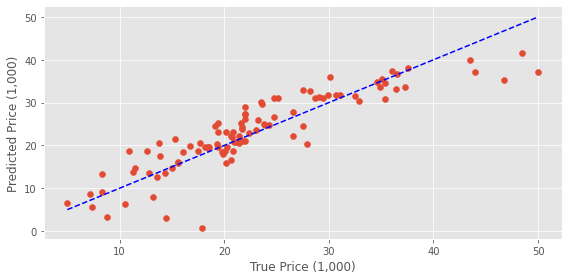

In [217]:
y_pred = model.predict(X_test)

plot_boston(y_test, y_pred)

In [218]:
#캘리포니아 집값 데이터에 대한 릿지 회귀
cali = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(cali.data, cali.target, test_size=0.2, random_state=2)

model = Ridge(alpha=0.2)

model.fit(X_train, y_train)

print(f'학습데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')

학습데이터 점수 : 0.6068205983305436
평가데이터 점수 : 0.60138408541952


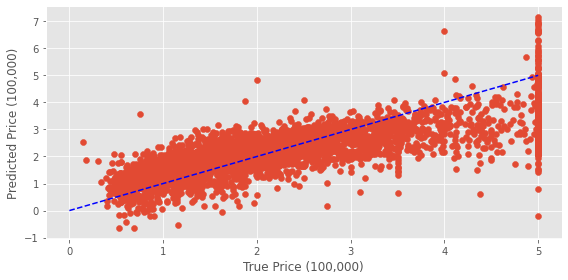

In [219]:
y_pred = model.predict(X_test)

plot_california(y_test, y_pred)

## Lasso 회귀(L1 regularization)
+ 릿지처럼 선형 회귀에 규제를 적용한 모델이지만, 릿지와 달리 가중치 각각의 절대값을 모두 더하는 방식
    + 모델의 설명력에 기여하지 못하는 독립변수의 회귀계수를 0으로 만든다.

In [220]:
#보스턴 집값 데이터에 대한 라쏘 회귀
from sklearn.linear_model import Lasso

X, y = load_boston(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

model = Lasso(alpha=0.001)

model.fit(X_train, y_train)

print(f'학습데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')

학습데이터 점수 : 0.7285789093906556
평가데이터 점수 : 0.7787997408318794


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        tar

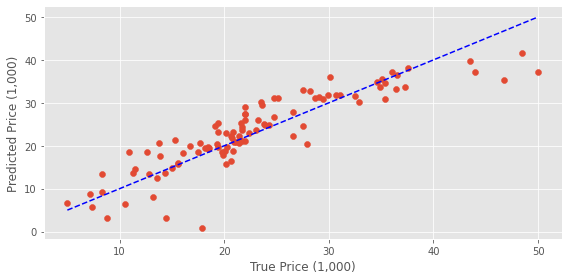

In [221]:
y_pred = model.predict(X_test)

plot_boston(y_test, y_pred)

In [222]:
#캘리포니아 집값 데이터에 대한 라쏘 회귀
cali = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(cali.data, cali.target, test_size=0.2, random_state=2)

model = Lasso(alpha=0.001)

model.fit(X_train, y_train)

print(f'학습데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')

학습데이터 점수 : 0.6067830496870499
평가데이터 점수 : 0.6012097690605123


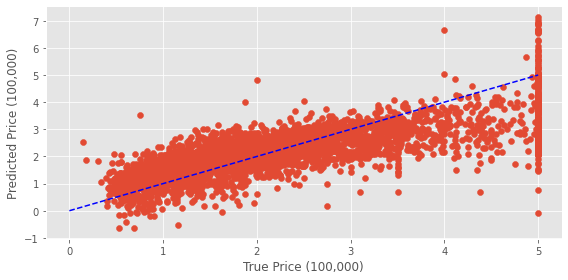

In [223]:
y_pred = model.predict(X_test)

plot_california(y_test, y_pred)

## Elastic Net
+ Ridge, Lasso의 모든 규제를 사용하는 선형 모델
+ 두 모델의 장점을 모두 갖고 있기 때문에, 좋은 성능을 보임
+ feature가 많거나, 서로 상관관계가 높은 feature가 존재할 때, Ridge나 Lasso보다 좋은 성능을 보여줌

In [224]:
#보스턴 집값 데이터에 대한 elastic net
from sklearn.linear_model import ElasticNet

X, y = load_boston(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

model = ElasticNet(alpha=0.0001, l1_ratio=0.3)

model.fit(X_train, y_train)

print(f'훈련데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')

훈련데이터 점수 : 0.7285778905784981
평가데이터 점수 : 0.7787358052780786


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        tar

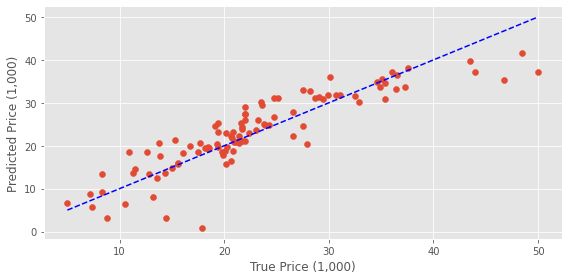

In [225]:
y_pred = model.predict(X_test)

plot_boston(y_test, y_pred)

In [226]:
#캘리포니아 집값 데이터에 대한 elastic net
cali = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(cali.data, cali.target, test_size=0.2, random_state=2)

model = ElasticNet(alpha=0.001, l1_ratio=0.5)

model.fit(X_train, y_train)

print(f'훈련데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')

훈련데이터 점수 : 0.6067994156485881
평가데이터 점수 : 0.6012455330532367


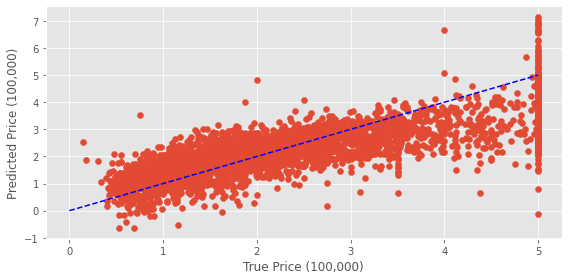

In [227]:
y_pred = model.predict(X_test)

plot_california(y_test, y_pred)

## 직교 정합 추구(Orthogonal Matching Pursuit)
+ 모델에 존재하는 가중치 벡터에 특별한 제약을 거는 방법
+ 가중치 벡터 w에서 0이 아닌 값이 k개 이하가 되도록 훈련  
    => 필요없는 feature를 모델이 훈련과정에서 자동으로 제거하도록 할 수 있음

In [228]:
#보스턴 집값 데이터에 대한 직교정합추구
from sklearn.linear_model import OrthogonalMatchingPursuit

X, y = load_boston(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

model = OrthogonalMatchingPursuit(n_nonzero_coefs=7)

model.fit(X_train, y_train)

print(f'훈련데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')

훈련데이터 점수 : 0.7084313847659374
평가데이터 점수 : 0.7718601880615821


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        tar

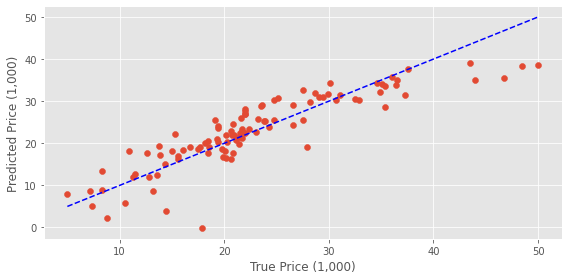

In [229]:
y_pred = model.predict(X_test)

plot_boston(y_test, y_pred)

In [230]:
model = OrthogonalMatchingPursuit(tol=1.)

model.fit(X_train, y_train)

print(f'훈련데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


훈련데이터 점수 : 0.7285831776605591
평가데이터 점수 : 0.7789207451814422


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_omp.py:758: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  coef_, self.n_iter_ = orthogonal_mp_gram(


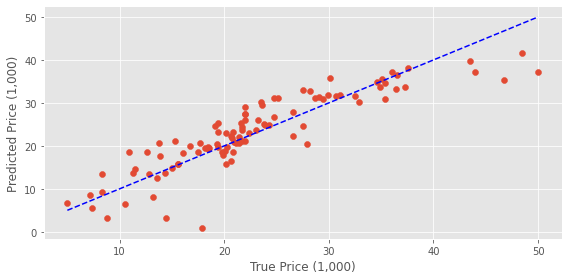

In [231]:
y_pred = model.predict(X_test)

plot_boston(y_test, y_pred)

In [232]:
#캘리포니아 집값 데이터에 대한 직교정합추구
cali = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(cali.data, cali.target, test_size=0.2, random_state=2)

model = OrthogonalMatchingPursuit(n_nonzero_coefs=7)

model.fit(X_train, y_train)

print(f'훈련데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


훈련데이터 점수 : 0.6067805628219882
평가데이터 점수 : 0.6015270766443168


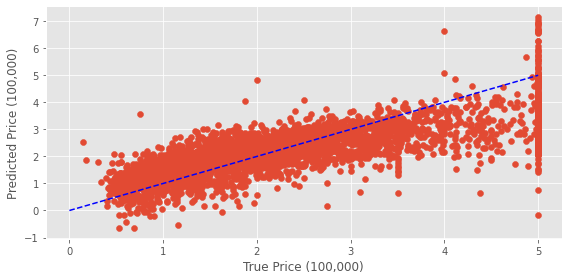

In [233]:
y_pred = model.predict(X_test)

plot_california(y_test, y_pred)

In [234]:
model = OrthogonalMatchingPursuit(tol=1.)

model.fit(X_train, y_train)

print(f'훈련데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_omp.py:758: RuntimeWarning: Orthogonal matching pursuit

훈련데이터 점수 : 0.6068205998456941
평가데이터 점수 : 0.6013853272055164


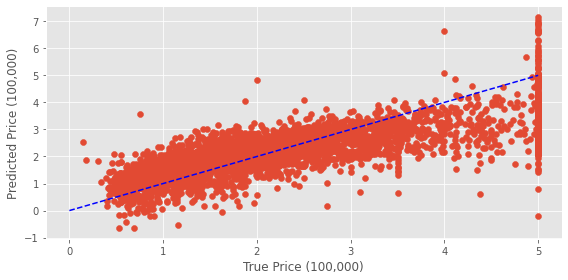

In [235]:
y_pred = model.predict(X_test)

plot_california(y_test, y_pred)

## 다항 회귀
+ 차수가 높아질수록 더 복잡한 데이터 학습 가능
+ 입력 데이터를 비선형 변환 후 사용하는 방법

In [236]:
#보스턴 집값 데이터셋에 다항회귀 적용
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

model = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    LinearRegression()
)

model.fit(X_train, y_train)

print(f'훈련데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        tar

훈련데이터 점수 : 0.9295925088768032
평가데이터 점수 : 0.8963635527280855


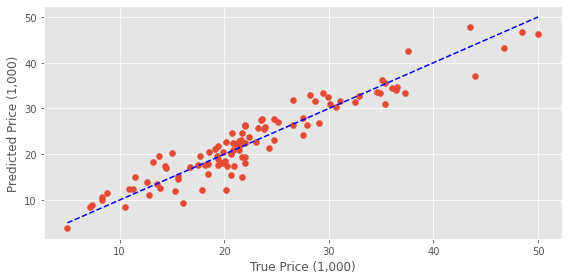

In [237]:
y_pred = model.predict(X_test)

plot_boston(y_test, y_pred)

In [238]:
#캘리포니아 집값 데이터셋에 다항회귀 적용
cali = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(cali.data, cali.target, test_size=0.2, random_state=2)

model = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    LinearRegression()
)

model.fit(X_train, y_train)

print(f'훈련데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')

훈련데이터 점수 : 0.6814638980284167
평가데이터 점수 : 0.6147331256307738


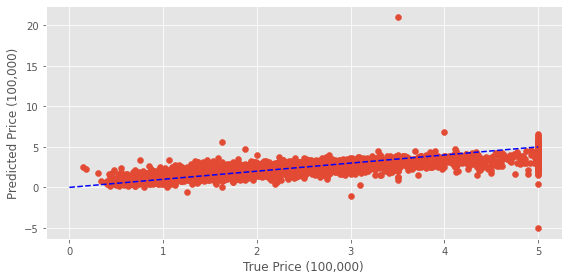

In [239]:
y_pred = model.predict(X_test)

plot_california(y_test, y_pred)